<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Юлия, привет :) Верни пожалуйста мои комментарии с плана

# Определение оттока клиентов в телеком  
## Задача - построить модель прогнозирующую отток клиента для компании "Ниединогоразрыва.ком".

#### Импортируем необходимые модули

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import time
import phik

import matplotlib as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from os import path

from scipy import stats as st
import math as mth
from xgboost import  XGBClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn import set_config
from sklearn.utils import shuffle
from numpy.random import RandomState
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline as sk_Pipeline
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

from catboost import Pool, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.3f}'.format)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [3]:

path_local = '/Users/kbzunder/Downloads/final_provider/'

if path.exists(path_local):
    contracts = pd.read_csv(path_local +'contract.csv')
    internet  = pd.read_csv(path_local + 'internet.csv')
    personal = pd.read_csv(path_local +'personal.csv')
    phone = pd.read_csv(path_local +'phone.csv')
else:
    path_train = '/datasets/final_provider/'
    contracts = pd.read_csv(path_train + 'contract.csv')
    internet =  pd.read_csv(path_train + 'internet.csv')
    personal = pd.read_csv(path_train + 'personal.csv')
    phone = pd.read_csv(path_train + 'phone.csv')


In [4]:
contracts.head(20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.650,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.100,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.750,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.800,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.150,3487.95


In [5]:
contracts[contracts['EndDate'] == 'No']['EndDate'].count()

5174

In [6]:
contracts.duplicated().sum()

0

In [7]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
fig = px.histogram(contracts, x='MonthlyCharges') 
fig.show()

In [9]:
contracts.describe()

,MonthlyCharges
count,7043.000
mean,64.762
std,30.090
min,18.250
25%,35.500
50%,70.350
75%,89.850
max,118.750


#### Целевой признак в задаче - расторжение или сохранение контракта ('EndDate' == 'No'), в нашем датасете из 7043 клиентов 5174 или 73 процента прододжают быть клиентами компании - данные несбалансированы, придется учитывать этот моменет при подготовке признаков.    

In [10]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [15]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### Первое впечатление от данных  
1. Данные в 4 датасетах, в каждом из которых отсутствуют пропуски  
2. В каждом датасете разное количество наблюдений  
3. Только стобцы `MonthlyCharges` , `TotalCharges` содержат числовую информацию о  выручке с клиента 
4. Данные необходимо объединить в один датафрейм по ключу  `customerID`  

### Метрика качества проекта - ROC-AUC (устойчива к выбросам), дополнительно будем включать в расчеты F1 score и accuracy.

### План работы над проектом  
1. Загрузка, обработка, изучение данных:
    * Загрузка данных. Предобработка: переименование столбцов, проверка типов данных  и замена типов данных (`TofalCharges` бросается в глаза, замена строковых типов дат на дату)
    * Объединение 4 датасетов в один, буду приджойнивать к датасету `contracts` остальные датасеты, содержащие дополнительную информацию  
    * Обработка полученного датасета:
        - Работа с пропусками, возникшими в результате объединения таблиц
        - Создание новых признаков (длительность контракта, пр)
        - Удаление ненужных в построении модели признаков (номер контракта, прочее)
        - Проверка датасета на мультиколлинеарность, удаление столбцов с высокой корреляцией
        - Анализ данных на выбросы, обработка выбросов
2. Подготовка данных к моделированию:
    * Разбиение датасета на тренировочную и тестовую выборки в отношении 75:25  
    * Нормирование данных, при необходимости устранение дисбаланса классов на тренировочной выборке

3. Построение pipeline моделей  с настройкой гиперпараметров, кросс-валидацией; обучение моделей с испльзованием GridSerch:
    * Логистическая регрессия
    * Случайный лес
    * Xboost/CatBoost
    * VotingClassifier
4. Выбор лучшей модели и провека качества модели на тестовых данных  
5. Вывод и рекомендации по модели  





### Вопросов на этом этапе проекта нет

[1. Загрузка данных](#data_download)  
[2. Знакомство в с данными. Предобработка](#data_preprocessing)  
[3. Объединение данных в один датасет, подготовка данных для обучения](#merging)  
[4. Выбор моделей обучения](#model_celection)  
[5. Проверка модели на тестовой выборке](#model_testing)  
[6. Анализ значимости признаков](#feature_selection)  
[7. Выводы](#Conclusion)  


<a id='data_download'></a>
### 1. Загрузка данных

In [34]:
# 

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> начинаю эту часть проверять с этого кода

<a id='data_preprocessing'></a>
### 2. Знакомство в с данными. Предобработка

#### Датасет contracts

In [16]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Переименуем столбцы, изменим тип данных в столбцах `BeginDate`, `EndDate` на дату, в столбце `TotalChanges` - на float64 

In [17]:
contracts_columns = ['customer_id','begin_date', 'end_date','type', 'paperless_billing', 'payment_mode', 'monthly_charges', 'total_charges']

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

In [18]:
contracts.columns = contracts_columns

In [19]:
contracts.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_mode,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.850,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.950,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.850,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.300,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.700,151.65


In [20]:
contracts['begin_date'] = pd.to_datetime(contracts['begin_date'])

In [21]:
# Заменим все строковые знаечения 'No' в столбце 'end_data' на дату окончания сбора данных - 1 февраля 2020 года
contracts.loc[contracts['end_date']=='No', 'end_date'] = '2020-02-01'

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна

In [22]:
contracts['end_date'] = pd.to_datetime(contracts['end_date'])

In [23]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_mode       7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


In [24]:
contracts['total_charges'] =  pd.to_numeric(contracts['total_charges'], errors='coerce')

In [25]:
contracts[contracts['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_mode,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.550,NaN
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.250,NaN
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.850,NaN
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.750,NaN
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.050,NaN
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.850,NaN
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.350,NaN
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.000,NaN
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.700,NaN
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.350,NaN


Пропуски в столбце `total_charges` связаны с тем, что это новые клиенты, только заключившие контракт, не успевшие принести доход, заполним эти пропуски 0

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> верно, это один из верных способов для этих данных

In [26]:
contracts['total_charges'] = contracts['total_charges'].fillna(0)

In [27]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_mode       7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [28]:
contracts.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_mode,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.850,29.850
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.950,1889.500
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.850,108.150
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.300,1840.750
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.700,151.650


In [29]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_mode       7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [30]:
# Добавим столбец с длительностью контракта в месяцах
contracts['contract_length_mnths'] = (contracts['end_date'] - contracts['begin_date']).dt.days/ 30

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> супер! есть новый полезный признак

In [31]:
# добавим год начала контракта
contracts['begin_year'] = contracts['begin_date'].dt.year

In [32]:
# добавим месяц начала контракта
contracts['begin_month'] = contracts['begin_date'].dt.month

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>и еще два :)


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> только обрати внимание, что мб утека (в зависимости как дальше используешь). Если будет начальная дата + длительность использования договора в признаках, по ней можно определить целевой признак, так как все уходы были раньше даты сбора

In [33]:
contracts.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_mode,monthly_charges,total_charges,contract_length_mnths,begin_year,begin_month
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.850,29.850,1.033,2020,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.950,1889.500,34.533,2017,4
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.850,108.150,2.033,2019,10
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.300,1840.750,45.700,2016,5
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.700,151.650,2.033,2019,9


In [34]:
# Добавим целевой столбец 'quit' - являтеся ли пользователь действующим клиентом компании (0) или ушедшим (1):
contracts.loc[contracts['end_date']== np.datetime64('2020-02-01'), 'quit'] = 0

In [35]:
contracts.loc[contracts['end_date'] != np.datetime64('2020-02-01'), 'quit'] = 1

In [36]:
contracts['quit'] = contracts['quit'].astype(int)

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ЦФ выделена верно

In [37]:
contracts.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_mode,monthly_charges,total_charges,contract_length_mnths,begin_year,begin_month,quit
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.850,29.850,1.033,2020,1,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.950,1889.500,34.533,2017,4,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.850,108.150,2.033,2019,10,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.300,1840.750,45.700,2016,5,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.700,151.650,2.033,2019,9,1


In [38]:
#проверим на дубликаты, и выбросы
contracts.duplicated().sum()

0

In [39]:
fig = px.box(contracts, x = 'total_charges', title='Размах суммарных расходов')

fig.show()

Выбросов нет, большая часть клиентов приносит до 4 тыс рублей, а медианный доход около 1400 руб

In [40]:
fig = px.histogram(contracts, x='contract_length_mnths', color ='quit', title='Распределение длительности контрактов в месяцах')
fig.show()

In [41]:
fig1 = px.histogram(contracts.query('quit==1'), x='contract_length_mnths', title='Распределение ушедших клиентов по длине контракта')
fig2 = px.histogram(contracts.query('quit==0'), x='contract_length_mnths', title = 'Распределение активных клиентов по длине контракта' )
fig1.show()
fig2.show()

Видим, что большинство тех, кто уходит, уходит быстро, через 1-3 месяца, а среди активных клиентов много старожилов, которые в компании более 5 лет 

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> супер, что смотрешь такие срезы в разрезе ушел-остался, информативно и наглядно (как для тебя, так и для заказчика)

#### Датасет internet

In [42]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [44]:
inter_columns = ['customer_id', 'internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

In [45]:
internet.columns = inter_columns

In [46]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [47]:
internet.duplicated().sum()

0

In [48]:
internet['internet_service'].value_counts()

Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64

В датасете `internet` меньше наблюдений, чем в contracts, не все пользовтели имеют контракт с интернет-услугами, в датасете нет пропусков и дубликатов, пользователи почти поровну распределяются по виду интренет услуг (Fiber optic и  DSL)

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, идем дальше

#### Датасет personal

In [49]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [50]:
person_columns = ['customer_id','gender','senior_citizen','partner','dependants']

In [51]:
personal.columns = person_columns

In [52]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependants      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [53]:
personal.duplicated().sum()

0

In [54]:
personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [55]:
fig = px.bar(personal.groupby('gender', as_index=False).agg({'customer_id':'nunique'})\
    .rename(columns={'customer_id':'customers'}), y='customers', x='gender', title='Распределение пользователей по полу')
fig.show()

In [56]:
personal['dependants'].value_counts()

No     4933
Yes    2110
Name: dependants, dtype: int64

In [58]:
fig = px.bar(personal.groupby('dependants', as_index=False).agg({'customer_id':'nunique'})\
    .rename(columns={'customer_id':'customers'}), y='customers', x='dependants', title='Распределение пользователей по наличию иждивенцев')
fig.show()

In [57]:
personal['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [58]:
fig = px.bar(personal.groupby('partner', as_index=False).agg({'customer_id':'nunique'})\
    .rename(columns={'customer_id':'customers'}), y='customers', x='partner', title='Распределение пользователей по наличию партнера')
fig.show()

In [59]:
personal['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [60]:
fig = px.bar(personal.groupby('senior_citizen', as_index=False).agg({'customer_id':'nunique'})\
    .rename(columns={'customer_id':'customers'}), y='customers', x='senior_citizen',\
         title='Распределение пользователей на пользователей до и после пенсионного возраста')
fig.show()

Среди клинтов примерно поровну мужчин и женщин, имеющих и не имеющих парнтеров, преобладают свободные от иждевенцев и не пенсионеры  


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> хорошо, к таким выводам было бы плюсом выводить графики - нагляднее и проще воспринимается

Количество строк в датасете соответствует `contracts`, нет дубликатов и пропусков

#### Датасет phone

In [61]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [62]:
phone = phone.rename(columns={'customerID':'customer_id','MultipleLines':'multiple_lines'})

In [63]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [64]:
phone.duplicated().sum()

0

In [65]:
phone['multiple_lines'].value_counts()

No     3390
Yes    2971
Name: multiple_lines, dtype: int64

In [66]:
fig = px.bar(phone.groupby('multiple_lines', as_index=False).agg({'customer_id':'nunique'})\
    .rename(columns={'customer_id':'customers'}), y='customers', x='multiple_lines',\
         title='Распределение пользователей по наличию мультиканальной телефонного связи')
fig.show()

В датасете `phone` меньше строк, не на всех пользоателей есть информация по нескольким телефонным лииниям, дубликатов и пропусков нет, примерно половина пользовтелей имеет несколько телефонных линий

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна

<a id='merging'></a>
### 3. Объединение данных в один датасет, подготовка данных для обучения

In [67]:
#Объединим датасеты в один, приджойнив остальные датасеты слева к датасету contracts
merged = contracts\
    .merge(personal, on='customer_id', how='left' )\
    .merge(internet, on='customer_id', how='left')\
    .merge(phone, on='customer_id', how='left')

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> верно, данные не потеряны

In [68]:
merged.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_mode,monthly_charges,total_charges,contract_length_mnths,begin_year,...,partner,dependants,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.850,29.850,1.033,2020,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.950,1889.500,34.533,2017,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.850,108.150,2.033,2019,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.300,1840.750,45.700,2016,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.700,151.650,2.033,2019,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [69]:
merged.isna().sum().sort_values(ascending=False)

streaming_movies         1526
streaming_tv             1526
tech_support             1526
device_protection        1526
online_backup            1526
online_security          1526
internet_service         1526
multiple_lines            682
begin_date                  0
dependants                  0
partner                     0
senior_citizen              0
customer_id                 0
quit                        0
begin_month                 0
begin_year                  0
contract_length_mnths       0
total_charges               0
monthly_charges             0
payment_mode                0
paperless_billing           0
type                        0
end_date                    0
gender                      0
dtype: int64

In [70]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            7043 non-null   object        
 1   begin_date             7043 non-null   datetime64[ns]
 2   end_date               7043 non-null   datetime64[ns]
 3   type                   7043 non-null   object        
 4   paperless_billing      7043 non-null   object        
 5   payment_mode           7043 non-null   object        
 6   monthly_charges        7043 non-null   float64       
 7   total_charges          7043 non-null   float64       
 8   contract_length_mnths  7043 non-null   float64       
 9   begin_year             7043 non-null   int64         
 10  begin_month            7043 non-null   int64         
 11  quit                   7043 non-null   int64         
 12  gender                 7043 non-null   object        
 13  sen

Пропуски в итоговом датасете связаны с отсутсвием данных - отсутствием у клиента данных услуг, считаю правильным заполнить их значением 'No'

In [71]:
merged = merged.fillna('No')

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна, логичное решение

In [74]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            7043 non-null   object        
 1   begin_date             7043 non-null   datetime64[ns]
 2   end_date               7043 non-null   datetime64[ns]
 3   type                   7043 non-null   object        
 4   paperless_billing      7043 non-null   object        
 5   payment_mode           7043 non-null   object        
 6   monthly_charges        7043 non-null   float64       
 7   total_charges          7043 non-null   float64       
 8   contract_length_mnths  7043 non-null   float64       
 9   begin_year             7043 non-null   int64         
 10  begin_month            7043 non-null   int64         
 11  quit                   7043 non-null   int64         
 12  gender                 7043 non-null   object        
 13  sen

In [88]:
#Удалим столбцы не нужные для анализа: customer_id, begin_date, end_date

In [72]:
merged = merged.drop(['customer_id', 'begin_date','end_date'], axis=1)

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> эти столбцы не нужны, верное удаление 

In [76]:

#Проверим корреляюцию признаков
correlation = merged.phik_matrix()

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'contract_length_mnths', 'begin_year', 'begin_month', 'quit', 'senior_citizen']


In [77]:
correlation[correlation > 0.7].fillna('')

,type,paperless_billing,payment_mode,monthly_charges,total_charges,contract_length_mnths,begin_year,begin_month,quit,gender,...,partner,dependants,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
type,1.000,,,,,,,,,,...,,,,,,,,,,
paperless_billing,,1.000,,,,,,,,,...,,,,,,,,,,
payment_mode,,,1.000,,,,,,,,...,,,,,,,,,,
monthly_charges,,,,1.000,0.763,,,,,,...,,,0.919,,,,,0.835,0.833,
total_charges,,,,0.763,1.000,0.842,0.733,,,,...,,,,,,,,,,
contract_length_mnths,,,,,0.842,1.000,0.927,,,,...,,,,,,,,,,
begin_year,,,,,0.733,0.927,1.000,,,,...,,,,,,,,,,
begin_month,,,,,,,,1.000,,,...,,,,,,,,,,
quit,,,,,,,,,1.000,,...,,,,,,,,,,
gender,,,,,,,,,,1.000,...,,,,,,,,,,


<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> супер, что исследуешь корреляцию. Это особенно важно для линейных моделей, отлично, что используешь phik

In [78]:
# Можно удалить один из двух столбцов, корреляция которых выше 0.7, удалим столбцы 'total_charges', 'streaming_movies', 'streaming_tv', 'contract_length_mnths' ,
# 'internet_service'
merged = merged.drop(columns=['streaming_movies','streaming_tv','total_charges','internet_service','contract_length_mnths'], axis=1)



<div class="alert alert-warning">
    <h2> Комментарий тимлида<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> Верно, но обрати внимание, что для нелинейных моделей можно было бы и оставить. Обычно для нелинейных моделей уже после оценки важности принимают решение об удалении. 
        
Есть несколько инструментов для отбора признаков, подробнее можно посмотреть в данной статье (Отбор признаков в задачах машинного обучения): https://habr.com/ru/post/550978/

В библиотеке sklearn есть методы mutual_info_regression и mutual_info_classif соответственно для регрессии и классификации.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif 

In [79]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_mode       7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   begin_year         7043 non-null   int64  
 5   begin_month        7043 non-null   int64  
 6   quit               7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependants         7043 non-null   object 
 11  online_security    7043 non-null   object 
 12  online_backup      7043 non-null   object 
 13  device_protection  7043 non-null   object 
 14  tech_support       7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
dtypes: float64(1), int64(4),

In [73]:
features = merged.drop(columns=['quit','begin_year'], axis=1)
target = merged['quit']

<div class="alert alert-success">
<h2> Комментарий тимлида  <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [74]:
features.head()

,type,paperless_billing,payment_mode,monthly_charges,total_charges,contract_length_mnths,begin_month,gender,senior_citizen,partner,dependants,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,Month-to-month,Yes,Electronic check,29.850,29.850,1.033,1,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,One year,No,Mailed check,56.950,1889.500,34.533,4,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.850,108.150,2.033,10,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,One year,No,Bank transfer (automatic),42.300,1840.750,45.700,5,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Month-to-month,Yes,Electronic check,70.700,151.650,2.033,9,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
Кодирование происходит до разбиения на выборки и используется get_dummies — возможное, но не лучшее решение. Стоит кодировать после разбиения на выборки (чтобы избежать утечки) и использовать OneHotEncoder ( что, если придут новые тестовые данные? Как будем кодировать? А если в них новое значение какого-то признака? А если другое количество уникальных значений признака?
    
Ели исспользуешь get_dummies, то после разбиения в обучающей и тестовой выборках важно проверять число и порядок получившихся столбцов, чтобы все совпадало

In [75]:
# Разделим данные на обучающую и тестовую выборку в отношении 75:25
features_train, features_test, target_train, target_test \
    = train_test_split(features, target,  train_size=0.75, random_state=101022, shuffle=target)

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  хорошо

In [76]:
(features_train.shape, target_train.shape)

((5282, 19), (5282,))

In [77]:
(features_test.shape, target_test.shape)

((1761, 19), (1761,))

#### Создадим pipeline

In [78]:
state = RandomState(101022)

In [79]:
classifiers = [
  LogisticRegression(random_state=state),
  RandomForestClassifier(random_state=state),
  XGBClassifier(random_state=state),
  AdaBoostClassifier(),
  CatBoostClassifier(eval_metric='AUC')
]

In [80]:
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  Здесь надо очень аккуратно использовать make_scorer. Его не очень принято использовать в стандартных метриках (как ROC AUC), используют обычно для собственных метрик. Но хорошо, что указываешь needs_threshold, выдавая выроятность старшего класса, без этого была бы ошибка

In [81]:
class_prarms = [
    { 'class__solver' : ['lbfgs', 'liblinear'],'class__penalty' :['l1','l2','none'], 'class__C': np.arange(0.5,1.5,0.25), 'class__fit_intercept' : [True, False] },
    {'class__max_features': ['auto','log2','sqrt', 'None'],'class__criterion' : ['gini', 'log_loss', 'entropy'], 'class__n_estimators' : range(10,1000,10), 'class__max_depth' : range(1,50), 'class__min_samples_split': range(1,10), 'class__min_samples_leaf': range(1,10)},
    {'class__eta': np.arange(0.01, 0.2, 0.01), 'class__max_depth': range(3,20), 'class__gamma' : np.arange(0,1,0.001),'class__learning_rate': np.arange(0.01, 1, 0.001), 'class__booster':['gbtree','gblinear'], 'class__n_estimators': range(10,1000,5)},
    {'class__n_estimators' : range(10,1000,10), 'class__learning_rate' : np.arange(0.1, 1, 0.01),'class__algorithm' : ['SAMME','SAMME.R'] },
    {'class__learning_rate': np.arange(0,1,0.001), 'class__iterations': range(5,100,1), 'class__depth': range(2,20), 'class__l2_leaf_reg':range(2,11), 'class__random_strength': range(0,11)}
]
cv = KFold(n_splits=10, shuffle=True, random_state=state)

In [82]:
features.head()

,type,paperless_billing,payment_mode,monthly_charges,total_charges,contract_length_mnths,begin_month,gender,senior_citizen,partner,dependants,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,Month-to-month,Yes,Electronic check,29.850,29.850,1.033,1,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,One year,No,Mailed check,56.950,1889.500,34.533,4,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.850,108.150,2.033,10,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,One year,No,Bank transfer (automatic),42.300,1840.750,45.700,5,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Month-to-month,Yes,Electronic check,70.700,151.650,2.033,9,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [83]:
cat_col = ['paperless_billing','payment_mode','gender','senior_citizen',\
    'partner','dependants','online_backup','online_security','device_protection',\
    'tech_support', 'multiple_lines','type','streaming_movies','streaming_tv','internet_service']

In [84]:
m_col = ['monthly_charges', 'begin_month','total_charges','contract_length_mnths']

In [85]:
features.columns

Index(['type', 'paperless_billing', 'payment_mode', 'monthly_charges',
       'total_charges', 'contract_length_mnths', 'begin_month', 'gender',
       'senior_citizen', 'partner', 'dependants', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

In [86]:
t = [('cat', OneHotEncoder(), cat_col), ('num', StandardScaler(), m_col)]
col_transform = ColumnTransformer(transformers=t)


In [87]:
from scipy import rand


best_esimators = []
best_score = []
for i, classifier in enumerate(classifiers):
    steps = [
       ('prep',col_transform),
       ('smote', SMOTE(random_state=state)),
       ('selector', VarianceThreshold()),
       ('class', classifier)
    ]
    pipeline = Pipeline(steps)
    grid = RandomizedSearchCV(pipeline,class_prarms[i] , scoring=roc_auc_scorer, cv=cv, n_iter=10)
    grid.fit(features_train, target_train)
    print(classifier, grid.best_estimator_)
    best_esimators.append(grid.best_estimator_)
    best_score.append(grid.best_score_)
   

LogisticRegression(random_state=RandomState(MT19937) at 0x1400B2340) Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['paperless_billing',
                                                   'payment_mode', 'gender',
                                                   'senior_citizen', 'partner',
                                                   'dependants',
                                                   'online_backup',
                                                   'online_security',
                                                   'device_protection',
                                                   'tech_support',
                                                   'multiple_lines', 'type',
                                                   'streaming_movies',
                                                   'streaming_tv',
                                              

KeyboardInterrupt: 

In [114]:
best_score

[0.8339413238350957,
 0.8456643373184562,
 0.8531419068604814,
 0.8514707481299709,
 0.8531799194388645]

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> вот тут то, о чем писала ранее. Утечка исходя из начальной даты + дюрации, пересмотри пожалуйста этот момент

<a id='model_testing'></a>
### 5. Проверка моделей на тестовой выборке

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>  Тестирование проводим только один раз для лучшей модели. Алгоритм такой - обучаем с кросс-валидацией и подбираем параметры на train, выбираем по лучшей метрике финальную модель, проводим на финальной модели тестирование.

In [115]:
from sklearn.metrics import accuracy_score


r_result = []
f_result = []
a_result = []
for estimator in best_esimators:
    estimator.fit(features_train, target_train)
    predicted = estimator.predict(features_test)
    r_score = roc_auc_score(target_test, predicted)
    accuracy = accuracy_score(target_test, predicted)
    f1 = f1_score(target_test, predicted)
    r_result.append(r_score)
    f_result.append(f1)
    a_result.append(accuracy)

0:	total: 1.71ms	remaining: 54.7ms
1:	total: 3.57ms	remaining: 55.4ms
2:	total: 5.22ms	remaining: 52.2ms
3:	total: 6.84ms	remaining: 49.6ms
4:	total: 8.48ms	remaining: 47.5ms
5:	total: 10.3ms	remaining: 46.1ms
6:	total: 12ms	remaining: 44.7ms
7:	total: 13.8ms	remaining: 43ms
8:	total: 15.7ms	remaining: 41.8ms
9:	total: 17.5ms	remaining: 40.2ms
10:	total: 19ms	remaining: 38ms
11:	total: 20.7ms	remaining: 36.3ms
12:	total: 22.3ms	remaining: 34.4ms
13:	total: 24ms	remaining: 32.6ms
14:	total: 25.7ms	remaining: 30.9ms
15:	total: 27.5ms	remaining: 29.2ms
16:	total: 29.2ms	remaining: 27.5ms
17:	total: 31ms	remaining: 25.8ms
18:	total: 32.6ms	remaining: 24ms
19:	total: 34.4ms	remaining: 22.4ms
20:	total: 36ms	remaining: 20.6ms
21:	total: 37.7ms	remaining: 18.9ms
22:	total: 39.4ms	remaining: 17.1ms
23:	total: 41ms	remaining: 15.4ms
24:	total: 42.7ms	remaining: 13.7ms
25:	total: 44.5ms	remaining: 12ms
26:	total: 46.6ms	remaining: 10.4ms
27:	total: 48.7ms	remaining: 8.69ms
28:	total: 50.7ms	rema

In [116]:
result_data = pd.DataFrame({'Модель': classifiers, 'roc_auc': r_result, 'accuracy': a_result, 'f1': f_result})

In [117]:
result_data

,Модель,roc_auc,accuracy,f1
0,LogisticRegression(random_state=RandomState(MT...,0.757,0.743,0.620
1,RandomForestClassifier(random_state=RandomStat...,0.736,0.771,0.606
2,"XGBClassifier(base_score=None, booster=None, c...",0.742,0.777,0.615
3,AdaBoostClassifier(),0.747,0.769,0.617
4,<catboost.core.CatBoostClassifier object at 0x...,0.742,0.789,0.618


In [554]:
best_esimators[0]

Pipeline(steps=[('smote',
                 SMOTE(random_state=RandomState(MT19937) at 0x155256C40)),
                ('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('class',
                 LogisticRegression(C=0.5, penalty='none',
                                    random_state=RandomState(MT19937) at 0x155254B40))])

<a id='feature_selection'></a>
### 6. Анализ значимости признаков

In [552]:
best_esimators[2]

Pipeline(steps=[('smote',
                 SMOTE(random_state=RandomState(MT19937) at 0x164243E40)),
                ('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('class',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.08,
                               eval_metric=None, gam...pu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.7159999999999994, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=710, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=189388003,
                               reg_alpha=0, ...))])

[0.00772734 0.00789265 0.03381195 0.03012098 0.02355598 0.00761486
 0.07477771 0.19289726 0.02906288 0.00152418 0.01612532 0.00298299
 0.0024268  0.00256592 0.00326293 0.31826517 0.16771571 0.01316136
 0.00208532 0.00438122 0.02326357 0.01215038 0.00633359 0.01629391]


<AxesSubplot: >

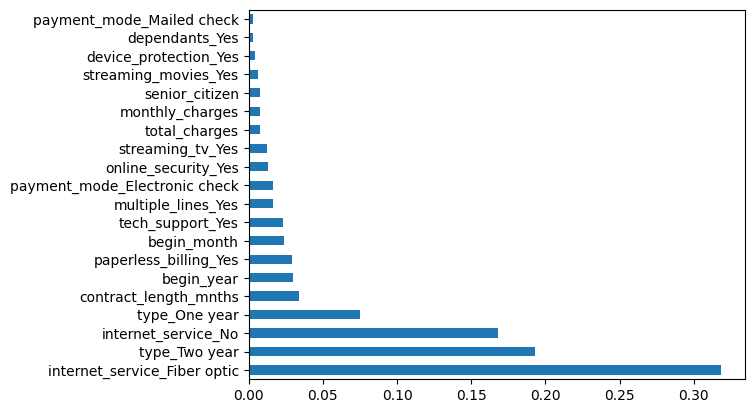

In [553]:
model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.08,
              eval_metric=None, gamma=0.229, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7159999999999994, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=710, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=189388003, reg_alpha=0)
model.fit(features_train, target_train)
print(model.feature_importances_)
# plot
feat_importances = pd.Series(model.feature_importances_, index=features_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

Самыми важными признаками, повлиявшими на уход клиента, модель XGBoost назвала вид соедниения интренета, вид контракта, и отутствие интернет-контракта 

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> супер! Важность признаков дает представление о логике модели

Результаты модели мне кажутся неправдоподобными: не может быть, чтобы  результат предсказания логистической регрессией был идеальным.   
До того, как я добавила год начала и месяц начала контркта, ROC-AUC не превышал у меня 0.81  


<a id='Conclusion'></a>
### 7.  Выводы


1. Провели обучение, настройку и проверку модели классификации для определения пользователей, которые готовы разорвать контркт с телекоммуникационной компанией  
2. Лучшей моделью по метрике `ROC-AUC` является `LogisticRegression`, roc-auc достигла на тестовой выборке `1`, accuracy и f1 мера также лушчие у этой модели   


<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Юлия</b>, было приятно проверять твою работу, она почти готова, ты молодец! 
    
Данные из разных таблиц собраны в один датафрейм, удалены аномалии, заполнены пропуски, получены новые признаки, а ненужные признаки удалены). Рассмотрено несколько моделей и сделан перебор параметров. Могу отметить самостоятельность и аналитический подход в выполнении проекта :)
   
Положительные моменты: 
    
- грамотное и понятное оформление кода;
    
- аналитический подход — при удалении признаков и формировании новых написано соответствующее обоснование;
    
    
- рассмотрены модели с перебором и использованы пайплайны.
    
На данном этапе нужно доработать:
    
- тестировать модель один раз;
    
- избавиться от утечки данных.
    
   
Если есть какие-то трудности, или нужны пояснения по проекту — смело пиши! Я постараюсь тебе помочь 😊

Жду твоего ответа!
    
</font>